In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import register_matplotlib_converters

data=pd.read_excel("/Users/shuxianglei/Desktop/all_mapping_0304.xlsx")
data

,ID,DOCUMENT_ID,DOCUMENT_TYPE,FILING_DATE,DETAIL_JSONcompany_name,avg_sent,FILINGID,FILINGDATE,PERIODDATE,TRADINGITEMID,...,SECTOR,SIMPLEINDUSTRYDESCRIPTION,REGION,COUNTRY,sum_sent,hit_count,positive_hits,negative_hits,section_count,word_count
0,2653299,89910821,AR,2018-10-18,Ngai Hing Hong Company Limited,0.53,89910821,2018-10-18T09:58:00Z,2018-06-30T00:00:00Z,20222258,...,Materials,Chemicals,Asia / Pacific,Hong Kong,19.26,2727,1669,1058,129,31885.0
1,2653299,89910821,AR,2018-10-18,Ngai Hing Hong Company Limited,0.63,89910821,2018-10-18T09:58:00Z,2018-06-30T00:00:00Z,20222258,...,Materials,Chemicals,Asia / Pacific,Hong Kong,19.70,2571,1600,971,82,30832.0
2,2730115,124853292,AR,2019-10-18,Ngai Hing Hong Company Limited,1.20,124853292,2019-10-18T04:53:00Z,2019-06-30T00:00:00Z,20222258,...,Materials,Chemicals,Asia / Pacific,Hong Kong,19.20,2979,1824,1155,110,34449.0
3,2723111,124859619,AR,2019-10-18,Ngai Hing Hong Company Limited,1.20,124859619,2019-10-18T04:53:00Z,2019-06-30T00:00:00Z,20222258,...,Materials,Chemicals,Asia / Pacific,Hong Kong,19.20,2979,1824,1155,110,34449.0
4,3814091,146378866,AR,2020-10-19,Ngai Hing Hong Company Limited,0.32,146378866,2020-10-19T04:59:00Z,2020-06-30T00:00:00Z,20222258,...,Materials,Chemicals,Asia / Pacific,Hong Kong,20.45,2675,1655,1020,150,31474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417740,3175672,24662629,AR,2014-12-31,Nostrum Oil & Gas PLC,-0.35,24662629,NaN,2014-12-31T00:00:00Z,1823875816,...,Energy,"Oil, Gas and Consumable Fuels",Europe,United Kingdom,-22.23,6953,3965,2988,193,85097.0
417741,2967101,13580072,AR,2015-12-31,Nostrum Oil & Gas PLC,0.05,13580072,NaN,2015-12-31T00:00:00Z,1823875816,...,Energy,"Oil, Gas and Consumable Fuels",Europe,United Kingdom,4.15,5937,3542,2395,392,74196.0
417742,2967101,13580072,AR,2015-12-31,Nostrum Oil & Gas PLC,0.09,13580072,NaN,2015-12-31T00:00:00Z,1823875816,...,Energy,"Oil, Gas and Consumable Fuels",Europe,United Kingdom,6.02,5706,3460,2246,379,70605.0
417743,2838799,73659153,AR,2017-12-31,Nostrum Oil & Gas PLC,-0.05,73659153,NaN,2017-12-31T00:00:00Z,1823875816,...,Energy,"Oil, Gas and Consumable Fuels",Europe,United Kingdom,-4.94,10306,5529,4777,298,119532.0


In [3]:
col1 = data["DETAIL_JSONcompany_name"]
col2 = data["COMPANYNAME"]
total = len(col1)
diff = (col1 != col2).sum()
print(total, diff)

417745 86518


In [4]:
data=data.sort_values("FILING_DATE")
data

,ID,DOCUMENT_ID,DOCUMENT_TYPE,FILING_DATE,DETAIL_JSONcompany_name,avg_sent,FILINGID,FILINGDATE,PERIODDATE,TRADINGITEMID,...,SECTOR,SIMPLEINDUSTRYDESCRIPTION,REGION,COUNTRY,sum_sent,hit_count,positive_hits,negative_hits,section_count,word_count
29594,4009406,26734570,AR,2004-06-30,Northern Dynasty Minerals Ltd.,0.74,26734570,2004-06-30T00:00:00Z,2004-05-31T00:00:00Z,2634601,...,Materials,Metals and Mining,United States and Canada,Canada,17.03,2513,1635,878,137,32669.0
166881,4014569,24503129,AR,2005-05-30,Restile Ceramics Limited,0.40,24503129,2005-05-30T00:00:00Z,2005-03-31T00:00:00Z,20213734,...,Industrials,Building Products,Asia / Pacific,India,4.47,628,441,187,45,7520.0
166882,4014569,24503129,AR,2005-05-30,Restile Ceramics Limited,0.40,24503129,2005-05-30T00:00:00Z,2005-03-31T00:00:00Z,20213734,...,Industrials,Building Products,Asia / Pacific,India,4.47,628,441,187,45,7520.0
2019,5165854,10018683,AR,2005-12-31,American Business Bank,0.32,10018683,NaN,2005-12-31T00:00:00Z,2588784,...,Financials,Banks,United States and Canada,United States,3.26,216,169,47,22,2139.0
2020,5165854,10018683,AR,2005-12-31,American Business Bank,0.32,10018683,NaN,2005-12-31T00:00:00Z,2588784,...,Financials,Banks,United States and Canada,United States,3.26,216,169,47,22,2139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,9257952,198963556,AR,2023-02-02,The Adirondack Trust Company,0.02,198963556,2023-02-02T00:00:00Z,2022-12-31T00:00:00Z,2587000,...,Financials,Banks,United States and Canada,United States,0.12,106,58,48,12,2010.0
249754,9258174,198967251,AR,2023-02-02,Rejlers AB (publ),0.43,198967251,2023-02-02T02:30:00Z,2022-12-31T00:00:00Z,31781087,...,Industrials,Professional Services,Europe,Sweden,4.78,425,344,81,34,7725.0
102333,9258224,196641293,AR,2023-02-02,"Asahi Group Holdings, Ltd.",1.23,196641293,2023-02-02T00:00:00Z,NaN,20167807,...,Consumer Staples,Beverages,Asia / Pacific,Japan,31.98,3349,2706,643,98,49734.0
215954,9257906,198962365,AR,2023-02-02,Indutrade AB (publ),0.21,198962365,2023-02-02T01:30:00Z,2023-02-01T00:00:00Z,24000296,...,Industrials,Machinery,Europe,Sweden,4.04,469,361,108,54,9796.0


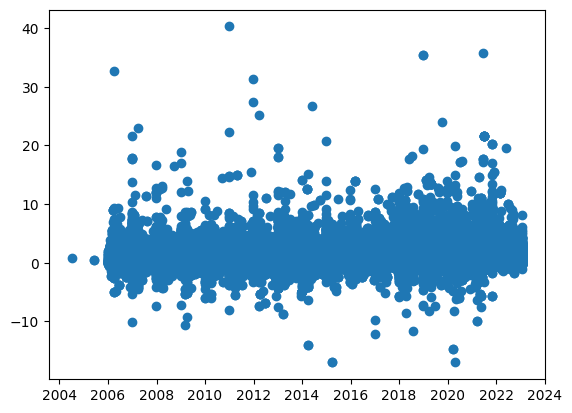

In [27]:
para="avg_sent"
x=data["FILING_DATE"]
y=data[para]
# print(type(x[1]))
plt.scatter(x,y)

In [20]:
max_col = "avg_sent"
max_value = data.loc[data[max_col].idxmax()]
max_value

ID                                                  3040905
DOCUMENT_ID                                        27494446
DOCUMENT_TYPE                                            AR
FILING_DATE                             2014-03-30 00:00:00
DETAIL_JSONcompany_name              Coalspur Mines Limited
avg_sent                                             653.31
FILINGID                                           27494446
FILINGDATE                             2014-03-30T20:00:00Z
PERIODDATE                             2013-12-31T00:00:00Z
TRADINGITEMID                                      20160780
TICKERSYMBOL                                            CPL
TRADINGITEMSTATUSNAME                              Inactive
COMPANYNAME                          Coalspur Mines Limited
SECURITYNAME                                Ordinary Shares
EXCHANGENAME                 Australian Securities Exchange
EXCHANGEIMPORTANCE                                     98.0
SECTOR                                  

In [17]:
data[max_col].idxmax()

93567

In [21]:
data = data.drop(index=93567)
data

,ID,DOCUMENT_ID,DOCUMENT_TYPE,FILING_DATE,DETAIL_JSONcompany_name,avg_sent,FILINGID,FILINGDATE,PERIODDATE,TRADINGITEMID,...,SECTOR,SIMPLEINDUSTRYDESCRIPTION,REGION,COUNTRY,sum_sent,hit_count,positive_hits,negative_hits,section_count,word_count
29594,4009406,26734570,AR,2004-06-30,Northern Dynasty Minerals Ltd.,0.74,26734570,2004-06-30T00:00:00Z,2004-05-31T00:00:00Z,2634601,...,Materials,Metals and Mining,United States and Canada,Canada,17.03,2513,1635,878,137,32669.0
166881,4014569,24503129,AR,2005-05-30,Restile Ceramics Limited,0.40,24503129,2005-05-30T00:00:00Z,2005-03-31T00:00:00Z,20213734,...,Industrials,Building Products,Asia / Pacific,India,4.47,628,441,187,45,7520.0
166882,4014569,24503129,AR,2005-05-30,Restile Ceramics Limited,0.40,24503129,2005-05-30T00:00:00Z,2005-03-31T00:00:00Z,20213734,...,Industrials,Building Products,Asia / Pacific,India,4.47,628,441,187,45,7520.0
2019,5165854,10018683,AR,2005-12-31,American Business Bank,0.32,10018683,NaN,2005-12-31T00:00:00Z,2588784,...,Financials,Banks,United States and Canada,United States,3.26,216,169,47,22,2139.0
2020,5165854,10018683,AR,2005-12-31,American Business Bank,0.32,10018683,NaN,2005-12-31T00:00:00Z,2588784,...,Financials,Banks,United States and Canada,United States,3.26,216,169,47,22,2139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,9257952,198963556,AR,2023-02-02,The Adirondack Trust Company,0.02,198963556,2023-02-02T00:00:00Z,2022-12-31T00:00:00Z,2587000,...,Financials,Banks,United States and Canada,United States,0.12,106,58,48,12,2010.0
249754,9258174,198967251,AR,2023-02-02,Rejlers AB (publ),0.43,198967251,2023-02-02T02:30:00Z,2022-12-31T00:00:00Z,31781087,...,Industrials,Professional Services,Europe,Sweden,4.78,425,344,81,34,7725.0
102333,9258224,196641293,AR,2023-02-02,"Asahi Group Holdings, Ltd.",1.23,196641293,2023-02-02T00:00:00Z,NaN,20167807,...,Consumer Staples,Beverages,Asia / Pacific,Japan,31.98,3349,2706,643,98,49734.0
215954,9257906,198962365,AR,2023-02-02,Indutrade AB (publ),0.21,198962365,2023-02-02T01:30:00Z,2023-02-01T00:00:00Z,24000296,...,Industrials,Machinery,Europe,Sweden,4.04,469,361,108,54,9796.0


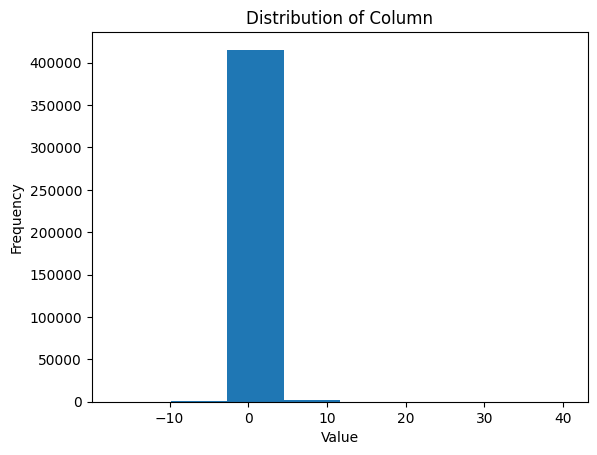

In [25]:
col = data['avg_sent']

col.plot.hist(bins=8)
plt.title("Distribution of Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [28]:
import scipy.stats as stats
col = data['word_count']
mean = col.mean()
std = col.std()

# 计算偏度和峰度
skewness = col.skew()
kurtosis = col.kurtosis()

print(skewness, kurtosis)

# 进行正态性检验
p_value = stats.normaltest(col)[1]

# 判断是否符合正态分布
if p_value < 0.05:
    print("该列数据不符合正态分布")
else:
    print("该列数据符合正态分布")

3.101840945624141 21.954581671941373
该列数据符合正态分布
